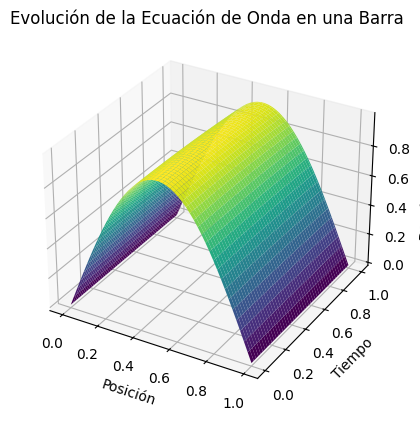

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def wave_equation(num_steps, num_points, r):
    length = 1.0  # Longitud de la barra
    T = 1.0  # Tiempo total
    delta_x = length / (num_points - 1)
    delta_t = T / num_steps

    # Inicialización de la malla
    u = np.zeros((num_points, num_steps + 1))

    # Condición inicial
    x = np.linspace(0, length, num_points)
    u[:, 0] = np.sin(np.pi * x)  # Ejemplo de condición inicial

    # Segunda condición inicial, derivada temporal cero
    u[:, 1] = u[:, 0]

    # Iteracion temporal
    for j in range(1, num_steps):
        for i in range(1, num_points - 1):
            u[i, j + 1] = (2 * (1 - r**2) * u[i, j] +
                           r**2 * (u[i + 1, j] + u[i - 1, j]) -
                           u[i, j - 1])

    # Visualización
    X, T = np.meshgrid(x, np.linspace(0, T, num_steps + 1))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, T, u.T, cmap='viridis')
    ax.set_xlabel('Posición')
    ax.set_ylabel('Tiempo')
    ax.set_zlabel('Desplazamiento')
    ax.set_title('Evolución de la Ecuación de Onda en una Barra')
    plt.show()

# Parámetros de la simulación
num_points = 50  # Número de puntos de la malla espacial
num_steps = 500  # Número de pasos de tiempo
r = 0.01  # Número de Courant

# Resolver la ecuación de onda
wave_equation(num_steps, num_points, r)